# Business Understanding

Malaysia is home to the local breed of cattle known as Kedah-Kelantan (KK) cattle. A small cattle with a fatty hump and an underdeveloped dewlap. KK cattle herd have mostly brown coat, a strong body conformation, and reddish, black, and grey spots. It is a well-adapted but slower growth performance cattle. However, KK cattle possess high fertility with an excellent mothering ability. Other than high fertility, it also has high survivability and well-adapted to Malaysia climate (Islam et al., 2021). KK cattle are a major breed found in many states of Malaysia with approximately 67% of the cattle production in Malaysia belongs to the KK cattle breed (Ariff et al., 2015).

Problem Statement:
Determining the growth of cattle to be slaughtered to obtain the maximum amount of meat possible is crucial to support local meat demand which as of now the local meat production are unable to cater the local demand. According to Department of Statistics Malaysia (2021), the local meat production can only supply about 22.2 percent of demand in Malaysia whereas the rest of it is dependent on importation. to curb this issue, analysing the factor influencing the growth of cattle is needed, hence this warrants the need of this study.


Objective
1. To build predictive models in predicting the growth of Kedah-Kelantan cattle.


# Data Understanding

In [27]:
## import libraries
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import scipy.stats as stats
import seaborn as sns 

#Standardise data value
from sklearn.preprocessing import StandardScaler

#Split data for train and test
from sklearn.model_selection import train_test_split

#remove warning message
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Load Dataframe
df = pd.read_csv("./DS Project/individual_case_data.csv")
df.head(10)

,body_weight,wither_height,body_length,head_length,sex,ad_libitum,castration,nth_born,age
0,247.882550,99.609679,96.332741,42.947545,male,no,yes,6,29
1,248.306667,100.284966,97.998042,43.927223,male,yes,yes,5,35
2,247.077742,99.177838,103.598485,42.940533,male,no,no,7,34
3,268.219763,114.922591,115.669466,48.480783,male,yes,no,2,29
4,266.007489,114.763730,130.533058,50.311455,male,yes,yes,5,30
5,265.778997,115.400174,125.499043,52.516749,male,yes,yes,7,26
6,265.161335,116.866442,115.538738,54.917098,male,no,no,8,36
7,264.895007,115.491723,122.491197,53.028312,male,no,yes,7,35
8,264.813573,116.900076,116.242191,50.823161,male,yes,yes,2,35
9,264.793416,117.137736,115.502314,50.702256,male,no,yes,3,24


In [3]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  500
Columns  :  9

Features : 
 ['body_weight', 'wither_height', 'body_length', 'head_length', 'sex', 'ad_libitum', 'castration', 'nth_born', 'age']

Missing values :   3

Unique values :  
 body_weight      500
wither_height    499
body_length      499
head_length      499
sex                2
ad_libitum         2
castration         2
nth_born           8
age               13
dtype: int64


Target Variable: Body Weight
    
features: 'wither_height', 'body_length', 'head_length', 'sex', 'ad_libitum', 'castration', 'nth_born', 'age'

In [4]:
### check data types
df.dtypes

body_weight      float64
wither_height    float64
body_length      float64
head_length      float64
sex               object
ad_libitum        object
castration        object
nth_born           int64
age                int64
dtype: object

In [5]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
body_weight      0
wither_height    1
body_length      1
head_length      1
sex              0
ad_libitum       0
castration       0
nth_born         0
age              0
dtype: int64


In [6]:
### First and Second Moment Business Decision ###

# Measures of central tendancies for all columns

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
body_weight,500.0,247.002337,7.789424,225.584867,241.819397,246.824593,252.406644,268.219763
wither_height,499.0,104.513237,6.865162,83.038249,100.018091,104.855299,108.914109,126.813921
body_length,499.0,98.301871,11.951743,67.042763,89.763935,98.462849,105.784272,130.533058
head_length,499.0,42.211896,4.396512,28.792356,39.267762,42.197896,44.811379,54.917098
nth_born,500.0,4.456000,2.343298,1.000000,2.000000,4.000000,6.000000,8.000000
age,500.0,30.304000,3.702838,24.000000,27.000000,30.000000,34.000000,36.000000


In [7]:
# Measures of central tendancies for all columns - only focus for string columns
df.describe(include = ['object'])

,sex,ad_libitum,castration
count,500,500,500
unique,2,2,2
top,male,yes,no
freq,408,254,301


In [8]:
### Third and Fourth Moment Business Decision ###

# Skew and Kurtosis - for numerical data type only


stats.mode(df.body_weight)
print('body_weight (skew) = ', df.body_weight.skew())
print('body_weight (kurtosis) = ', df.body_weight.kurt())
print('')
stats.mode(df.wither_height)
print('wither_height (skew) = ', df.wither_height.skew())
print('wither_height (kurtosis) = ', df.wither_height.kurt())
print('')
stats.mode(df.body_length)
print('body_length (skew) = ', df.body_length.skew())
print('body_length (kurtosis) = ', df.body_length.kurt())
print('')
stats.mode(df.head_length)
print('head_length (skew) = ', df.head_length.skew())
print('head_length (kurtosis) = ', df.head_length.kurt())
print('')
stats.mode(df.nth_born)
print('nth_born (skew) = ', df.nth_born.skew())
print('nth_born (kurtosis) = ', df.nth_born.kurt())
print('')
stats.mode(df.age)
print('age (skew) = ', df.age.skew())
print('age (kurtosis) = ', df.age.kurt())


body_weight (skew) =  0.028737567299114437
body_weight (kurtosis) =  -0.12891619586284442

wither_height (skew) =  0.0036783602732873566
wither_height (kurtosis) =  0.1281419401671129

body_length (skew) =  0.10153816132288977
body_length (kurtosis) =  -0.30989190162209557

head_length (skew) =  0.03357906750555691
head_length (kurtosis) =  0.06241207193389986

nth_born (skew) =  0.00785404038709982
nth_born (kurtosis) =  -1.2683169615969165

age (skew) =  -0.08844716609164407
age (kurtosis) =  -1.2502739046570979


Based on the low skew values of each column, the distribution of the data is close to normal and close to symmetrical.

All the columns provide kurtosis values below 3 , then this indicates a low amount of outlier values or called as playtokurtic.

Data Visualisation

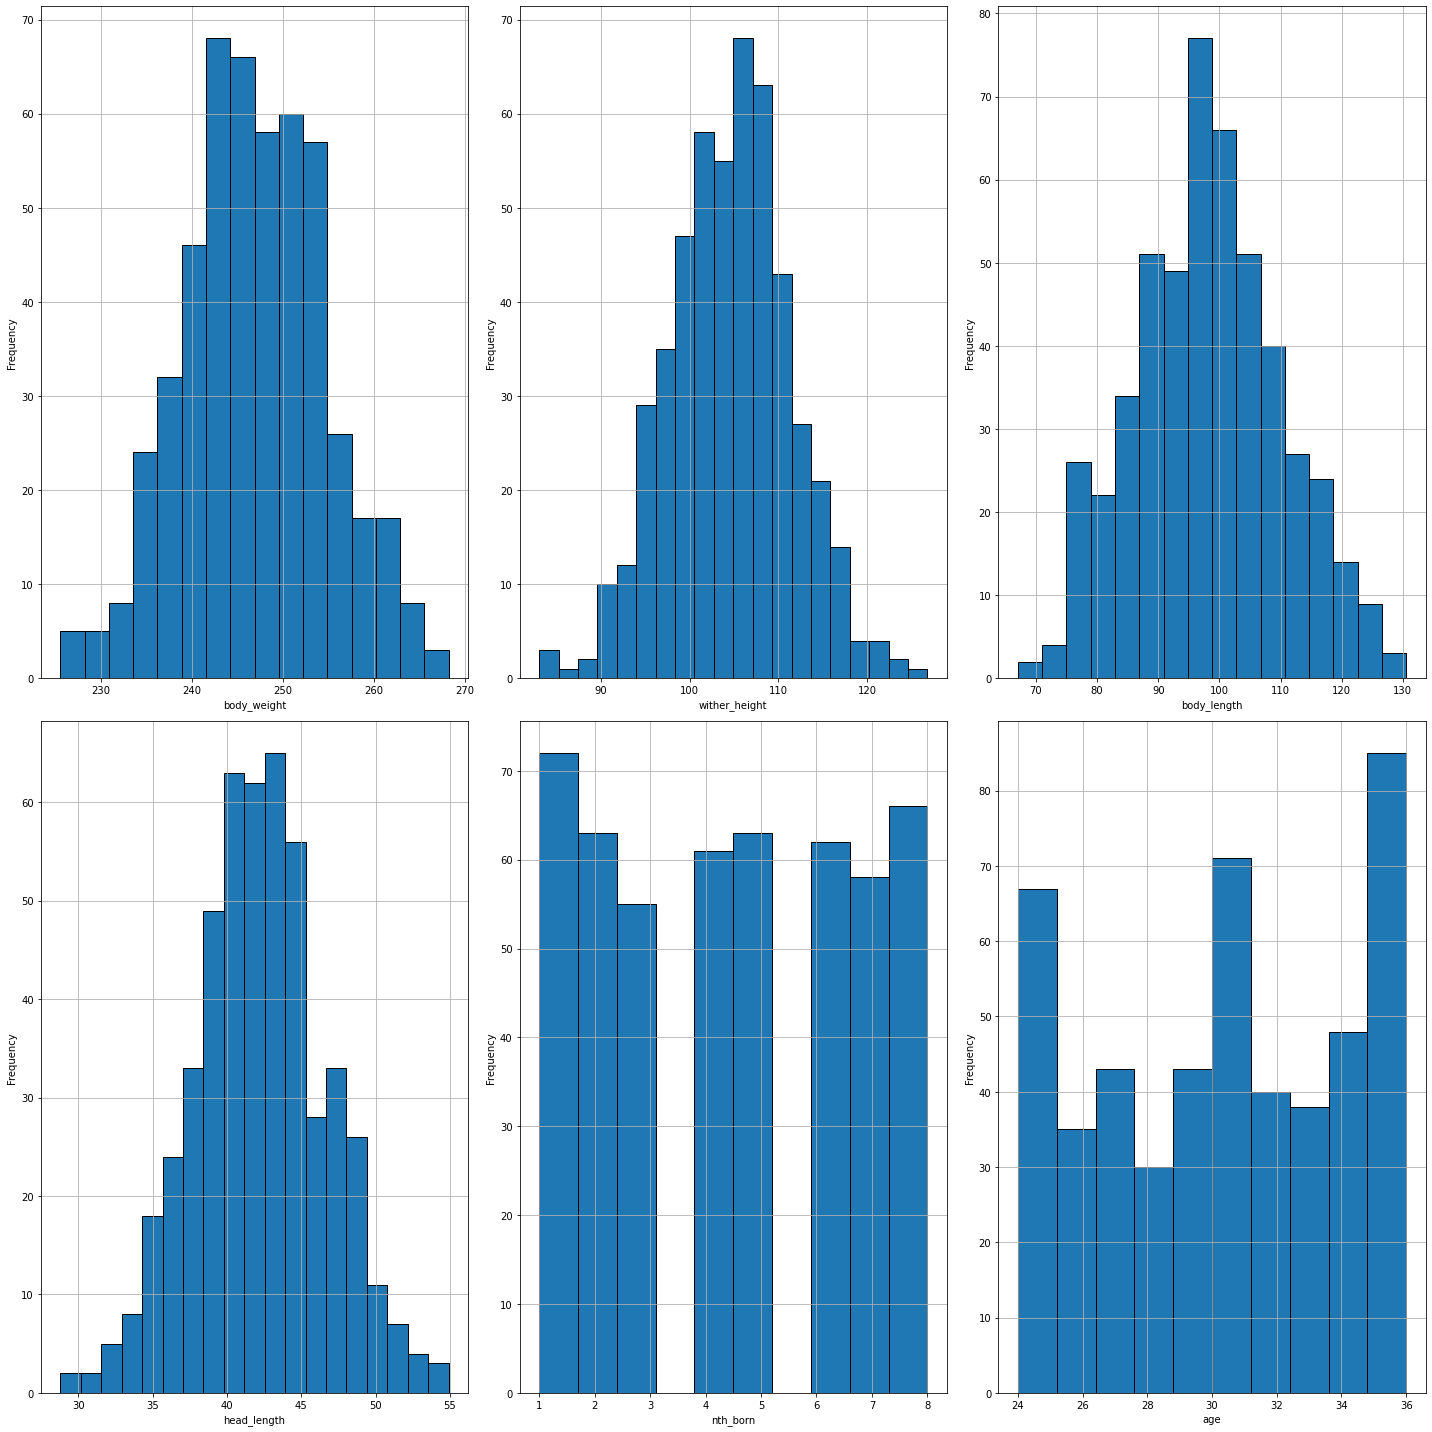

In [9]:
### Histograms ###

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
df.body_weight.hist(bins='auto', edgecolor='black', ax=ax[0, 0], )
ax[0,0].set_xlabel('body_weight')
ax[0,0].set_ylabel('Frequency')
df.wither_height.hist(bins='auto', edgecolor='black', ax=ax[0, 1])
ax[0,1].set_xlabel('wither_height')
ax[0,1].set_ylabel('Frequency')
df.body_length.hist(bins='auto', edgecolor='black', ax=ax[0, 2])
ax[0,2].set_xlabel('body_length')
ax[0,2].set_ylabel('Frequency')
df.head_length.hist(bins='auto', edgecolor='black', ax=ax[1,0])
ax[1,0].set_xlabel('head_length')
ax[1,0].set_ylabel('Frequency')
df.nth_born.hist(bins='auto', edgecolor='black', ax=ax[1,1])
ax[1,1].set_xlabel('nth_born')
ax[1,1].set_ylabel('Frequency')
df.age.hist(bins='auto', edgecolor='black', ax=ax[1,2])
ax[1,2].set_xlabel('age')
ax[1,2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Most numerical columns is normally distributed except for nth born is uniform distribution with missing value and age is uniform distributed.

Text(0, 0.5, 'Frequency')

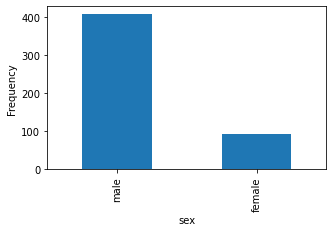

In [10]:
## Bar Graph
# sex	ad_libitum	castration
ax = df['sex'].value_counts().plot(kind='bar', figsize=(5,3))
ax.set_xlabel("sex")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

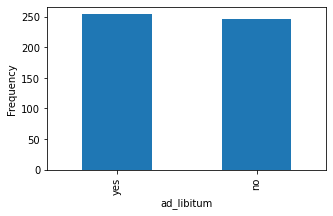

In [11]:
ax1 = df['ad_libitum'].value_counts().plot(kind='bar', figsize=(5,3))
ax1.set_xlabel("ad_libitum")
ax1.set_ylabel("Frequency")

In [12]:
df['ad_libitum'].value_counts()

yes    254
no     246
Name: ad_libitum, dtype: int64

Text(0, 0.5, 'Frequency')

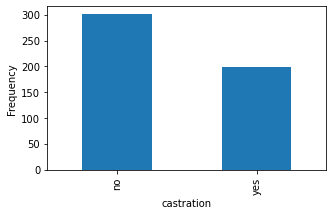

In [13]:
ax1 = df['castration'].value_counts().plot(kind='bar', figsize=(5,3))
ax1.set_xlabel("castration")
ax1.set_ylabel("Frequency")

In [14]:
df['castration'].value_counts()

no     301
yes    199
Name: castration, dtype: int64

Data Cleansing

For this section it focus on cleanse the dataset. It's include identify and impute missing value, identify outliers, remove any duplicates row, correlation between dependant and independant variables which also include identify and remove any high correlated value

In [15]:
#1. Identify and Impute Missing value
# Based on above code there are been identify 3 columns have missing value - wither_height, body_length, head_length
# Next step will be impute missing value

#numerical data (except those in 1,0 or with 3+...)
numericalData = df[['body_weight','wither_height', 'body_length', 'head_length', 'nth_born', 'age']]

#print
numericalData.head()

,body_weight,wither_height,body_length,head_length,nth_born,age
0,247.882550,99.609679,96.332741,42.947545,6,29
1,248.306667,100.284966,97.998042,43.927223,5,35
2,247.077742,99.177838,103.598485,42.940533,7,34
3,268.219763,114.922591,115.669466,48.480783,2,29
4,266.007489,114.763730,130.533058,50.311455,5,30


In [16]:
#fill the missing values with mean
for x in numericalData.iloc[:,1:].columns:
    numericalData[x] = numericalData[x].fillna(numericalData[x].mean())

In [17]:
#check the null values in nuemricalData for handling purpose
numericalData.isnull().any()

body_weight      False
wither_height    False
body_length      False
head_length      False
nth_born         False
age              False
dtype: bool

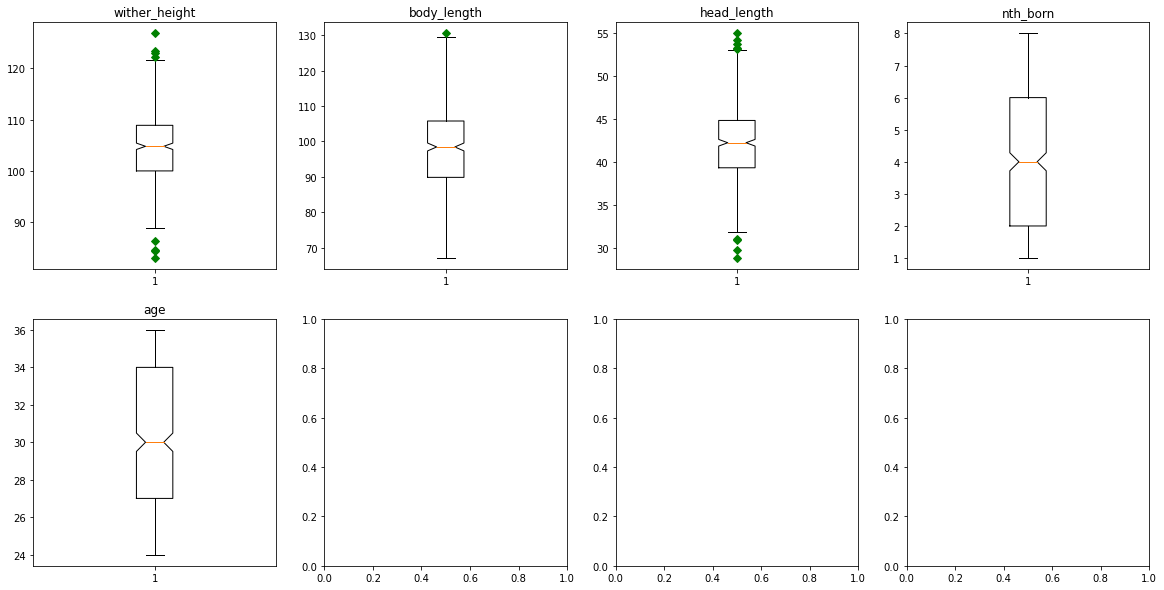

In [18]:

### Box plots ###

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

ax[0,0].boxplot(numericalData["wither_height"], 1, 'gD')
ax[0,0].set_title('wither_height')

ax[0,1].boxplot(numericalData.body_length, 1, 'gD')
ax[0,1].set_title('body_length')

ax[0,2].boxplot(numericalData.head_length , 1, 'gD')
ax[0,2].set_title('head_length')

ax[0,3].boxplot(numericalData.nth_born, 1, 'gD')
ax[0,3].set_title('nth_born')

ax[1,0].boxplot(numericalData.age, 1, 'gD')
ax[1,0].set_title('age')
plt.show()

Based on above boxplot it have outliers for columns wither_height, body_length,head_length, nth_born, and age

In [19]:
#categorical data (those that not in numericalData variable)
categoricalData = df[['sex','ad_libitum','castration']]

#print
categoricalData.head()

,sex,ad_libitum,castration
0,male,no,yes
1,male,yes,yes
2,male,no,no
3,male,yes,no
4,male,yes,yes


In [20]:
#change the string into numeric 
sexNum = pd.Categorical(categoricalData["sex"]).codes 
ad_libitumNum = pd.Categorical(categoricalData["ad_libitum"]).codes
castrationNum = pd.Categorical(categoricalData["castration"]).codes

#add the col into the table
categoricalData['sex'] = sexNum 
categoricalData["ad_libitum"] = ad_libitumNum 
categoricalData["castration"] = castrationNum

#print to see is there any columns with null
categoricalData.head()

,sex,ad_libitum,castration
0,1,0,1
1,1,1,1
2,1,0,0
3,1,1,0
4,1,1,1


In [21]:
#concatenate the categorical data and numerical data together as nwData
nwData = pd.concat([categoricalData,numericalData],axis=1)
nwData.head()

,sex,ad_libitum,castration,body_weight,wither_height,body_length,head_length,nth_born,age
0,1,0,1,247.882550,99.609679,96.332741,42.947545,6,29
1,1,1,1,248.306667,100.284966,97.998042,43.927223,5,35
2,1,0,0,247.077742,99.177838,103.598485,42.940533,7,34
3,1,1,0,268.219763,114.922591,115.669466,48.480783,2,29
4,1,1,1,266.007489,114.763730,130.533058,50.311455,5,30


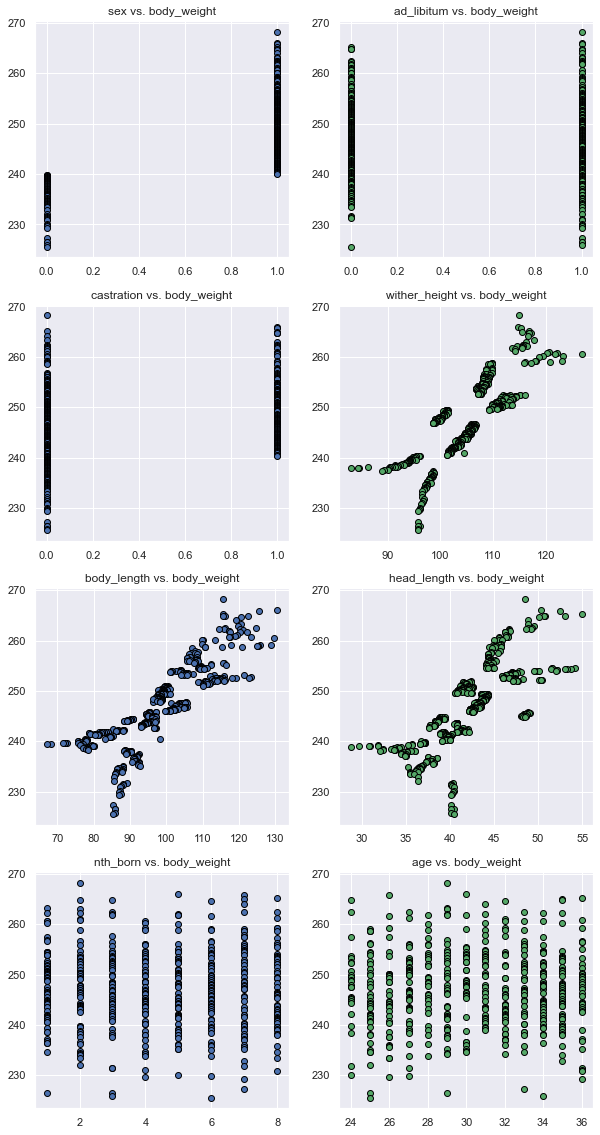

In [68]:
### Scatter plots ###

sex = nwData['sex']
ad_libitum = nwData['ad_libitum']
castration = nwData['castration']
body_weight = nwData['body_weight']
wither_height = nwData['wither_height']
body_length = nwData['body_length']
head_length = nwData['head_length']
nth_born = nwData['nth_born']
age = nwData['age']


fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

ax[0,0].scatter(sex, body_weight, c='b', edgecolors='black')
ax[0,0].set_title('sex vs. body_weight')

ax[0,1].scatter(ad_libitum, body_weight, c='g', edgecolors='black')
ax[0,1].set_title('ad_libitum vs. body_weight')

ax[1,0].scatter(castration, body_weight, c='b', edgecolors='black')
ax[1,0].set_title('castration vs. body_weight')
ax[1,1].scatter(wither_height, body_weight, c='g', edgecolors='black')
ax[1,1].set_title('wither_height vs. body_weight')

ax[2,0].scatter(body_length, body_weight, c='b', edgecolors='black')
ax[2,0].set_title('body_length vs. body_weight')
ax[2,1].scatter(head_length, body_weight, c='g', edgecolors='black')
ax[2,1].set_title('head_length vs. body_weight')

ax[3,0].scatter(nth_born, body_weight, c='b', edgecolors='black')
ax[3,0].set_title('nth_born vs. body_weight')
ax[3,1].scatter(age, body_weight, c='g', edgecolors='black')
ax[3,1].set_title('age vs. body_weight')

plt.show()



Based on the scatter plot, for continous data type it's shows correlation against dependant variable

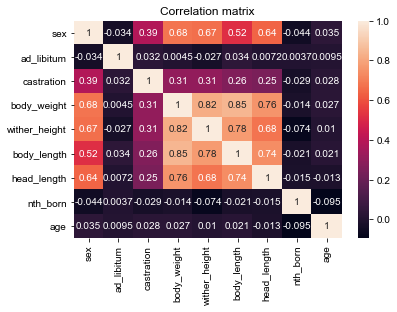

In [25]:
# Plotting a heatmap to calculate correlation between the inputs and the outputs

nwData_hm = sns.heatmap(nwData.corr(), annot = True)
nwData_hm.set(title = 'Correlation matrix')
sns.set(rc={"figure.figsize":(15,20)})
plt.show()

# Model Building

Spliting data

The data set will be split into training and testing sets. The training set will be used to train the model and testing set will be used to test the model. The data spliting is based on percentage. The training set is 70% of the data set ewhile testing set is 30% of the data set

In [28]:
X = nwData.drop(['body_weight'],axis=1)
y = nwData.loc[:,['body_weight']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [30]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
x_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_train.columns)
x_train_scaled.head()

,sex,ad_libitum,castration,wither_height,body_length,head_length,nth_born,age
0,0.468521,1.005731,-0.782881,1.327784,0.882888,-0.016800,-0.612043,0.492089
1,0.468521,1.005731,-0.782881,-0.410504,-1.513732,-0.465451,0.232987,-1.415536
2,0.468521,-0.994302,1.277333,1.274661,1.234936,1.240769,1.500533,1.582161
3,-2.134375,1.005731,-0.782881,-1.269137,-0.912109,-0.451361,-0.189528,-1.143018
4,0.468521,1.005731,-0.782881,0.361958,1.737036,0.849607,1.078017,0.764607


In [33]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1, shuffle=True)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, X, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, X, y, cv=cv, scoring='r2').mean())

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train_scaled, y_train)

In [35]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,3.396436,0.801452
1,Ridge Regression,3.394410,0.801677
2,Lasso Regression,3.527539,0.787069
3,K Neighbors Regressor,3.331416,0.806368
4,Decision Tree Regressor,1.635381,0.955309
5,Random Forest Regressor,1.371763,0.967435
6,Gradient Boosting Regressor,1.571061,0.955411
7,Adaboost Regressor,2.042678,0.925492


Random Forest Regressor has the lowest RMSE, highest R-Squared

In [48]:
RandomForestRegressor()

RandomForestRegressor()

In [50]:
#tuning for number of trees
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              "bootstrap": [True, False]}
clf = GridSearchCV(RandomForestRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=5).fit(x_train_scaled, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

RandomForestRegressor(bootstrap=False, max_depth=10, min_samples_split=100,
                      n_estimators=510, random_state=1)
R Squared: 0.8517516621641837


Since the tuning lower the R squared then we will remain result without tuning the model

In [51]:
#applying this model on test data
x_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns = X_test.columns)
clf = RandomForestRegressor().fit(x_train_scaled, y_train)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(x_test_scaled))))
print("Test R^2: ", r2_score(y_test, clf.predict(x_test_scaled)))

Test RMSE:  1.1928707869877577
Test R^2:  0.9776641642441374


In [55]:
predictions = clf.predict(x_test_scaled)
predictions

array([254.19801843, 246.41267795, 245.57206827, 237.75727058,
       236.14058768, 259.34496305, 243.27341166, 229.98259206,
       250.61261024, 250.62478382, 247.35243373, 246.59430492,
       241.23464351, 245.32184012, 250.31060588, 244.45040104,
       235.39157473, 243.12970303, 250.52773509, 257.76276781,
       248.61320274, 242.09650342, 247.50524556, 253.37266902,
       256.80532586, 237.89311327, 261.71603143, 242.14133043,
       253.61337794, 247.57744476, 238.70255049, 252.71251809,
       261.25044196, 250.66950525, 241.49477364, 229.55636084,
       244.42503523, 237.68028337, 243.18962032, 247.62319664,
       243.79068085, 256.90148855, 240.09022505, 248.06925683,
       254.96739858, 248.13797438, 248.63908503, 243.96973444,
       239.36091027, 250.81228371, 242.09357969, 250.01786729,
       243.15676843, 251.42067524, 258.89537682, 263.49239074,
       243.98104868, 250.10730967, 248.20408472, 243.31314983,
       254.70896284, 245.61268702, 240.98440485, 238.90

In [67]:
y_test.head()

,body_weight
90,254.061875
254,246.623683
283,245.541477
445,237.735053
461,235.990978


the difference between the predicted value and test data is pretty small.